## Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading train csv file

In [9]:
df_train = pd.read_csv('train.csv')

In [10]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Converting pandas core frame to numpy array

In [11]:
df_train = np.array(df_train)

In [12]:
# m = number of rows and n = number of columns
m, n = df_train.shape
print("number of rows : ",m)
print("number of columns : ",n)

number of rows :  60000
number of columns :  785


## Reading Test CSV file 

In [14]:
df_test = pd.read_csv('test.csv')
df_test = np.array(df_test)

In [15]:
df_test = df_test.T
print("data_dev first 1000 rows : ",df_test)

data_dev first 1000 rows :  [[7 2 1 ... 4 5 6]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
Y_dev = df_test[0]
X_dev = df_test[1:n]
X_dev = X_dev/255.
print(X_dev)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
df_train = df_train.T
Y_train = df_train[0]
X_train = df_train[1:n]
X_train = X_train/255.

print(X_train.shape)
_, m_train = X_train.shape

(784, 60000)


In [18]:
Y_train.shape

(60000,)

## Initialize Parameters

In [19]:
def init_params(input_nodes, hidden_nodes):
    output_nodes = len(set(Y_train))
    W1 = np.random.rand(hidden_nodes, input_nodes) - 0.5
    b1 = np.random.rand(hidden_nodes, 1) - 0.5
    W2 = np.random.rand(output_nodes, hidden_nodes) - 0.5
    b2 = np.random.rand(output_nodes, 1) - 0.5
    return W1, b1, W2, b2

## ReLU Activation Function Calculation

In [20]:
def ReLU(Z):
    return np.maximum(Z, 0)

## Softmax Activation Function Calculation

In [21]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

## Forward Propagation

In [22]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [23]:
def ReLU_deriv(Z):
    return Z>0

In [24]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

## Backward Propagation

In [25]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m*dZ2.dot(A1.T)
    db2 = 1 / m*np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2,one_hot_Y

## Update parameters

In [26]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

## Calculate Cross Entropy Loss function

In [27]:
def crossentropy_loss(output_prob, Y):
    s = np.sum(np.multiply(Y, np.log(output_prob)))
    m = Y.shape[0]
    value = -(1./(m * 10000)) * s
    return value

## Get Prediction Value

In [28]:
def get_predictions(A2):
    return np.argmax(A2, 0)

## Calculate Accuracy

In [29]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

## Gradient Descent

In [30]:
def gradient_descent(X, Y, alpha, iterations,W1, b1, W2, b2):
    loss_list = []
    acc_list = []
    loss = 0
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2, one_hot_Y = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        pred_val = get_predictions(A2)
        acc = get_accuracy(pred_val, Y)
        
        loss = crossentropy_loss(A2, one_hot_Y)
        loss_list.append(loss)
        acc_list.append(acc)
        
        if i == iterations-1:
            print(f"Accuracy is : {acc} and loss is : {loss}")
            
#             print(f"Epoch is : {}")
#         if i % 10 == 0:
#             print("Iteration: ", i)
#             predictions = get_predictions(A2)
#             print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2,acc_list, loss_list

## Calculation and Graph Representation

For Hidden Nodes :10 
 Learning Rate : 0.01 
 epochs : 20
----------------------------------------------------------
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[3 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[9 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[9 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[9 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[9 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[9 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[9 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[9 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[9 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
[9 5 5 ... 3 5 5] [5 0 4 ... 5 6 8]
Accuracy is : 0.13786666666666667 and loss is : 1.5033560510504786


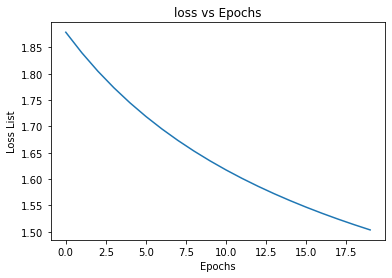

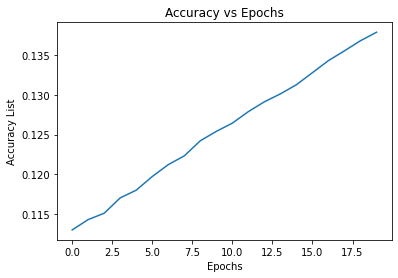

----------------------------------------------------------
For Hidden Nodes :10 
 Learning Rate : 0.1 
 epochs : 50
----------------------------------------------------------
[6 6 6 ... 6 6 6] [5 0 4 ... 5 6 8]
[4 0 0 ... 3 0 0] [5 0 4 ... 5 6 8]
[7 0 0 ... 3 6 0] [5 0 4 ... 5 6 8]
[7 0 0 ... 6 6 0] [5 0 4 ... 5 6 8]
[7 0 0 ... 6 8 0] [5 0 4 ... 5 6 8]
[4 0 0 ... 6 8 0] [5 0 4 ... 5 6 8]
[4 0 0 ... 6 8 0] [5 0 4 ... 5 6 8]
[4 0 0 ... 6 8 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 8 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 6 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 6 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 6 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 6 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 6 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 6 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 0 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 0 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 0 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 0 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 0 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 0 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 0 0] [5 0 4 ... 5 6 8]
[2 0 0 ... 6 0 0] [5 0 4 ... 5 6 

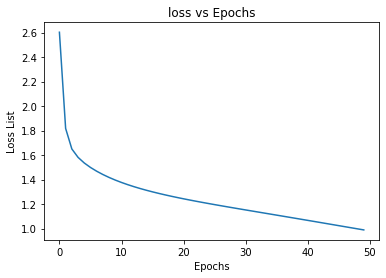

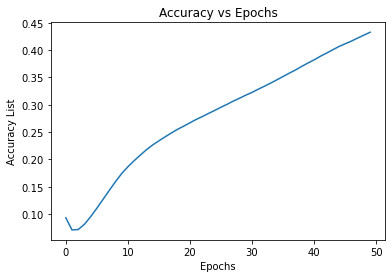

----------------------------------------------------------
For Hidden Nodes :20 
 Learning Rate : 0.02 
 epochs : 50
----------------------------------------------------------
[5 5 5 ... 8 0 0] [5 0 4 ... 5 6 8]
[5 5 5 ... 8 0 0] [5 0 4 ... 5 6 8]
[5 5 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 5 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 5 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 5 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 5 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 5 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 5 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 5 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 5 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
[9 0 3 ... 8 0 8] [5 0 4 ... 5 6

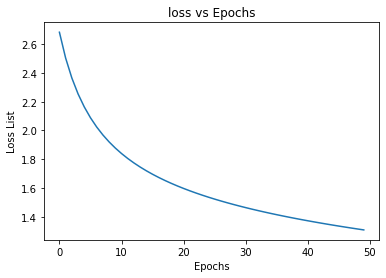

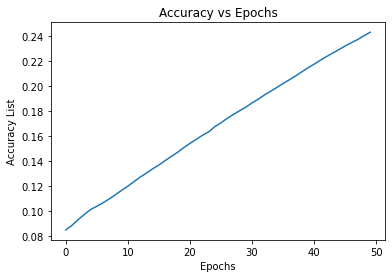

----------------------------------------------------------
For Hidden Nodes :2 
 Learning Rate : 0.01 
 epochs : 10
----------------------------------------------------------
[8 0 0 ... 8 6 6] [5 0 4 ... 5 6 8]
[8 0 0 ... 8 6 6] [5 0 4 ... 5 6 8]
[8 0 0 ... 8 6 6] [5 0 4 ... 5 6 8]
[8 0 0 ... 8 6 6] [5 0 4 ... 5 6 8]
[8 0 0 ... 8 6 6] [5 0 4 ... 5 6 8]
[8 0 0 ... 8 6 6] [5 0 4 ... 5 6 8]
[8 0 0 ... 8 6 6] [5 0 4 ... 5 6 8]
[8 0 0 ... 8 6 6] [5 0 4 ... 5 6 8]
[8 0 0 ... 8 6 6] [5 0 4 ... 5 6 8]
[8 0 0 ... 8 6 6] [5 0 4 ... 5 6 8]
Accuracy is : 0.13023333333333334 and loss is : 1.4294448163905482


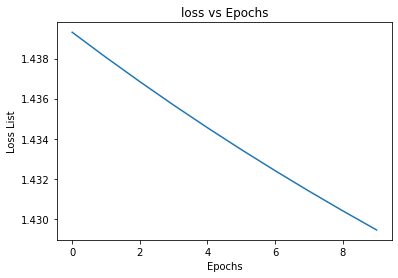

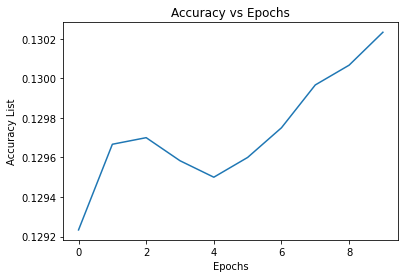

----------------------------------------------------------
For Hidden Nodes :4 
 Learning Rate : 0.5 
 epochs : 25
----------------------------------------------------------
[2 2 7 ... 7 7 7] [5 0 4 ... 5 6 8]
[2 2 8 ... 2 6 8] [5 0 4 ... 5 6 8]
[2 2 4 ... 2 6 9] [5 0 4 ... 5 6 8]
[2 2 4 ... 2 6 9] [5 0 4 ... 5 6 8]
[6 2 4 ... 9 6 9] [5 0 4 ... 5 6 8]
[6 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[6 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[6 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[6 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
[3 0 4 ... 8 6 8] [5 0 4 ... 5 6 8

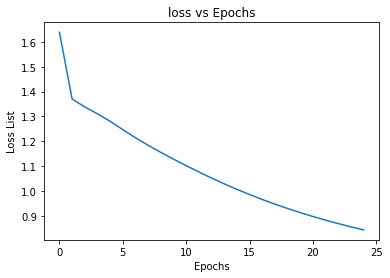

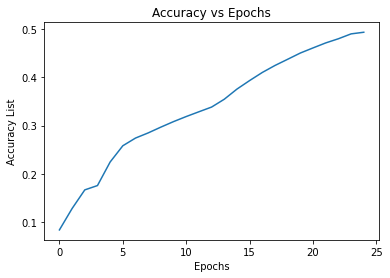

----------------------------------------------------------


In [31]:
H = [10, 10, 20, 2, 4]
learning_rate = [0.01, 0.1, 0.02, 0.01, 0.5]
epochs = [20, 50, 50, 10, 25]

size_input = 784

for idx in range(5):
    W1,b1,W2,b2 = init_params(size_input, H[idx])
    print(f"For Hidden Nodes :{H[idx]} \n Learning Rate : {learning_rate[idx]} \n epochs : {epochs[idx]}")
    print("----------------------------------------------------------")
    W1, b1, W2, b2,acc_list, loss_list = gradient_descent(X_train, Y_train, learning_rate[idx], epochs[idx], W1, b1, W2, b2)
    
    # Plot loss vs Epochs
    plt.plot(range(epochs[idx]),loss_list)
    plt.title("loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss List")
    plt.show()
    
    # Plot Accuracy vs Epochs
    plt.plot(range(epochs[idx]),acc_list)
    plt.title("Accuracy vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy List")
    plt.show()
    
    print("----------------------------------------------------------")

For Hidden Nodes :10 
 Learning Rate : 0.01 
 epochs : 20
----------------------------------------------------------
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
[1 7 5 ... 1 1 4] [7 2 1 ... 4 5 6]
Accuracy is : 0.0903 and loss is : 0.29801310769404066


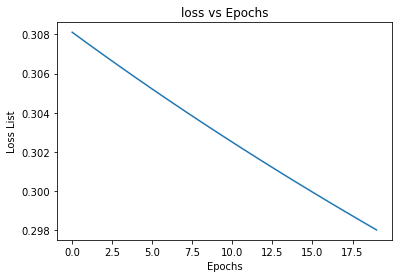

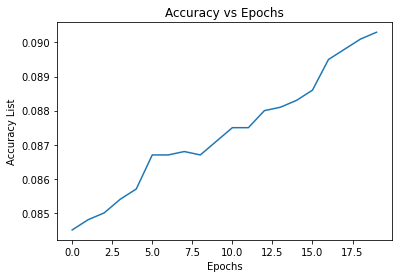

----------------------------------------------------------
For Hidden Nodes :10 
 Learning Rate : 0.1 
 epochs : 50
----------------------------------------------------------
[5 7 6 ... 0 0 0] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 6 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 7 9 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 8 9 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 8 9 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 8 9 ... 0 0 4] [7 2 1 ... 4 5 6]
[5 8 9 ... 0 0 4] [7 2 1 ... 4 5 

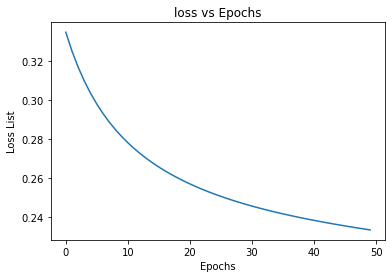

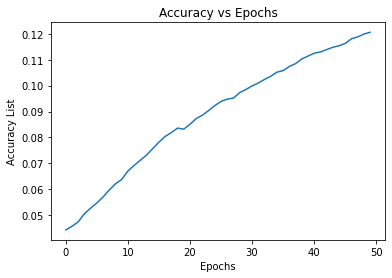

----------------------------------------------------------
For Hidden Nodes :20 
 Learning Rate : 0.02 
 epochs : 50
----------------------------------------------------------
[9 7 7 ... 3 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 3 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5 6]
[9 7 7 ... 9 7 7] [7 2 1 ... 4 5

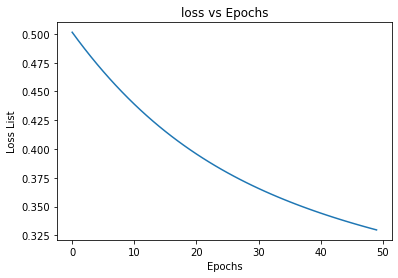

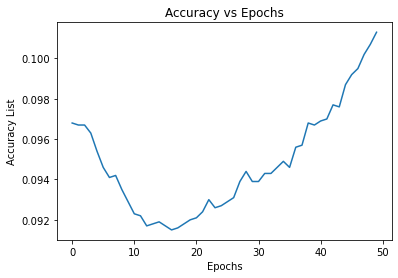

----------------------------------------------------------
For Hidden Nodes :2 
 Learning Rate : 0.01 
 epochs : 10
----------------------------------------------------------
[0 5 5 ... 5 5 5] [7 2 1 ... 4 5 6]
[0 5 5 ... 5 5 5] [7 2 1 ... 4 5 6]
[0 5 5 ... 5 5 5] [7 2 1 ... 4 5 6]
[0 5 5 ... 5 5 5] [7 2 1 ... 4 5 6]
[0 5 5 ... 5 5 5] [7 2 1 ... 4 5 6]
[0 5 5 ... 5 5 5] [7 2 1 ... 4 5 6]
[0 5 5 ... 5 5 5] [7 2 1 ... 4 5 6]
[0 5 5 ... 5 5 5] [7 2 1 ... 4 5 6]
[0 5 5 ... 5 5 5] [7 2 1 ... 4 5 6]
[0 5 5 ... 5 5 5] [7 2 1 ... 4 5 6]
Accuracy is : 0.0936 and loss is : 0.26762919333892377


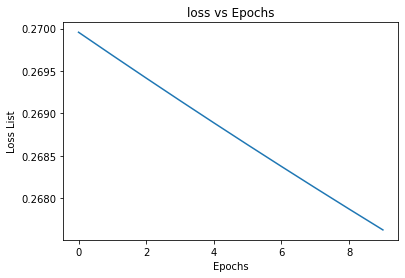

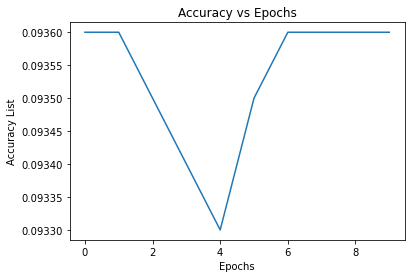

----------------------------------------------------------
For Hidden Nodes :4 
 Learning Rate : 0.5 
 epochs : 25
----------------------------------------------------------
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 7] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 7] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 7] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 7] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 7] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 0] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 0] [7 2 1 ... 4 5 6]
[6 6 6 ... 6 6 0] [7 2 1 ... 4 5 6

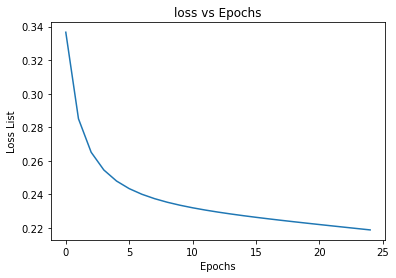

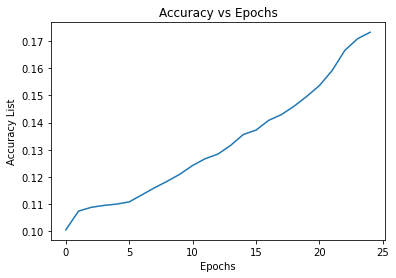

----------------------------------------------------------


In [32]:
H = [10, 10, 20, 2, 4]
learning_rate = [0.01, 0.1, 0.02, 0.01, 0.5]
epochs = [20, 50, 50, 10, 25]

size_input = 784

for idx in range(5):
    W1,b1,W2,b2 = init_params(size_input, H[idx])
    print(f"For Hidden Nodes :{H[idx]} \n Learning Rate : {learning_rate[idx]} \n epochs : {epochs[idx]}")
    print("----------------------------------------------------------")
    W1, b1, W2, b2,acc_list, loss_list = gradient_descent(X_dev, Y_dev, learning_rate[idx], epochs[idx], W1, b1, W2, b2)
    
    # Plot loss vs Epochs
    plt.plot(range(epochs[idx]),loss_list)
    plt.title("loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss List")
    plt.show()
    
    # Plot Accuracy vs Epochs
    plt.plot(range(epochs[idx]),acc_list)
    plt.title("Accuracy vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy List")
    plt.show()
    
    print("----------------------------------------------------------")